
Первые 5 строк DataFrame:
           track_id              track_name    artist_name         album_name  \
0  TRK-BEBD53DA84E1         Agent every (0)    Noah Rhodes  Beautiful instead   
1  TRK-6A32496762D7           Night respond  Jennifer Cole              Table   
2  TRK-47AA7523463E  Future choice whatever  Brandon Davis      Page southern   
3  TRK-25ADA22E3B06     Bad fall pick those    Corey Jones             Spring   
4  TRK-9245F2AD996A                 Husband      Mark Diaz        Great prove   

  release_date  genre  duration_ms  popularity  danceability  energy  key  \
0   2016-04-01    Pop       234194          55          0.15    0.74    9   
1   2022-04-15  Metal       375706          45          0.44    0.46    0   
2   2016-02-23   Rock       289191          55          0.62    0.80    8   
3   2015-10-12    Pop       209484          51          0.78    0.98    1   
4   2022-07-08  Indie       127435          39          0.74    0.18   10   

   loudness  mode  inst

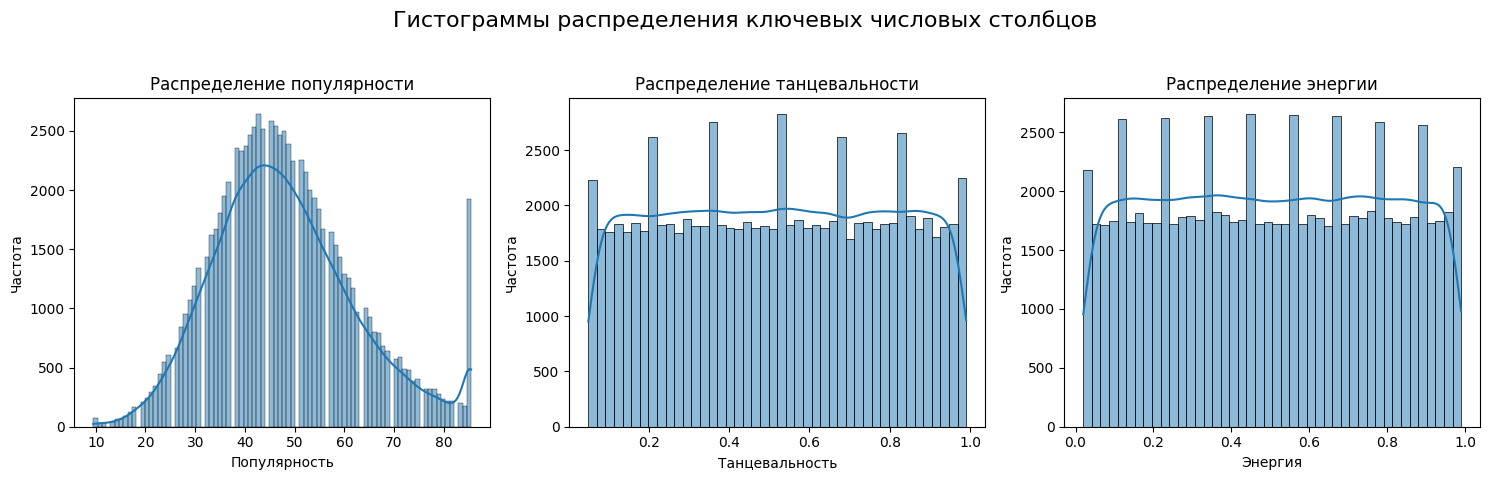

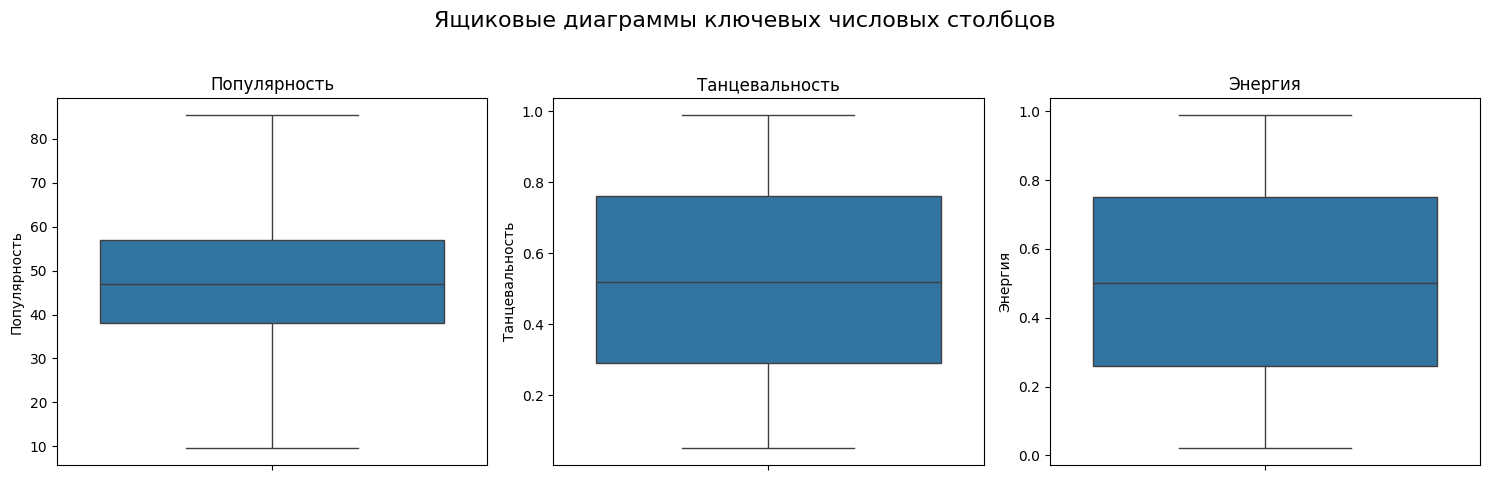

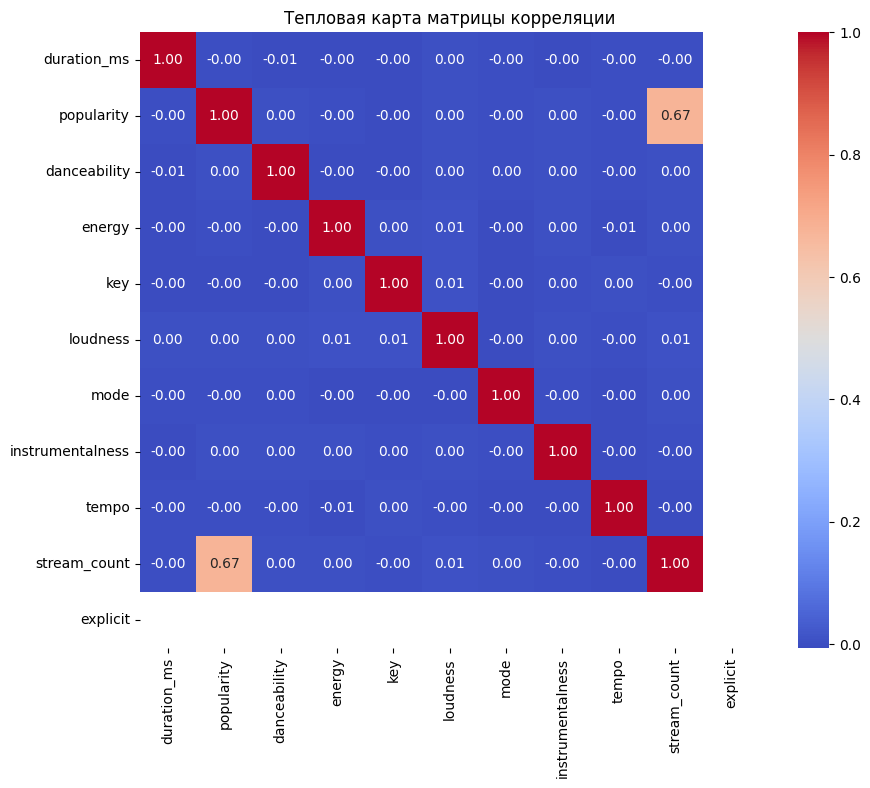


Группировка данных по году выпуска альбома:
                   popularity                 danceability                 \
                         mean       sum count         mean      sum count   
track_release_year                                                          
2015                48.075189  381717.0  7940     0.524746  4166.48  7940   
2016                47.824974  366148.0  7656     0.520611  3985.80  7656   
2017                47.865946  367419.0  7676     0.516083  3961.45  7676   
2018                47.930485  375775.0  7840     0.522149  4093.65  7840   
2019                47.789343  366831.0  7676     0.517957  3975.84  7676   
2020                48.048205  374776.0  7800     0.519392  4051.26  7800   
2021                48.280798  360561.0  7468     0.523996  3913.20  7468   
2022                47.992370  371125.0  7733     0.523030  4044.59  7733   
2023                48.114793  375343.5  7801     0.521096  4065.07  7801   
2024                48.078722  

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/spotify_2015_2025_85k.csv')


print('\nПервые 5 строк DataFrame:')
print(df.head())

print('\nОбщая информация о DataFrame:')
df.info()

print('\nОписательная статистика для числовых столбцов:')
print(df.describe())

print('\nКоличество уникальных значений для каждого столбца:')
print(df.nunique())

print('\nКоличество пропущенных значений до обработки:')
print(df.isnull().sum())

for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
        else:
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
print('Количество пропущенных значений после обработки:')
print(df.isnull().sum())

initial_rows = df.shape[0]
duplicates_count = df.duplicated().sum()
print(f'\nКоличество полных дубликатов строк: {duplicates_count}')
df.drop_duplicates(inplace=True)
print(f'Дубликаты удалены. Новое количество строк: {df.shape[0]} (удалено {initial_rows - df.shape[0]} дубликатов)')


numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    df[col] = np.clip(df[col], lower_bound, upper_bound)
    print(f'Столбец \'{col}\': {outliers_count} выбросов обработано (значения \'подтянуты\' к границам).')


print('\nМатрица корреляции для числовых столбцов:')
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

plt.figure(figsize=(15, 5))
plt.suptitle('Гистограммы распределения ключевых числовых столбцов', fontsize=16)

plt.subplot(1, 3, 1)
sns.histplot(df['popularity'], kde=True)
plt.title('Распределение популярности')
plt.xlabel('Популярность')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot(df['danceability'], kde=True)
plt.title('Распределение танцевальности')
plt.xlabel('Танцевальность')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.histplot(df['energy'], kde=True)
plt.title('Распределение энергии')
plt.xlabel('Энергия')
plt.ylabel('Частота')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(15, 5))
plt.suptitle('Ящиковые диаграммы ключевых числовых столбцов', fontsize=16)

plt.subplot(1, 3, 1)
sns.boxplot(y=df['popularity'])
plt.title('Популярность')
plt.ylabel('Популярность')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['danceability'])
plt.title('Танцевальность')
plt.ylabel('Танцевальность')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['energy'])
plt.title('Энергия')
plt.ylabel('Энергия')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта матрицы корреляции')
plt.show()


df['release_date'] = pd.to_datetime(df['release_date'])
df['track_release_year'] = df['release_date'].dt.year

print('\nГруппировка данных по году выпуска альбома:')
if 'track_release_year' in df.columns:
    grouped_data = df.groupby('track_release_year').agg({
        'popularity': ['mean', 'sum', 'count'],
        'danceability': ['mean', 'sum', 'count'],
        'energy': ['mean', 'sum', 'count'],
        'stream_count': ['mean', 'sum', 'count']
    })
    print(grouped_data.head(10))
else:
    print('Столбец не найден для группировки(')